# Horn Radio Telescope Spectra Plotting Usage Examples

### Glen Langston, 2021 October 26

This notebook shows examples of using previously averaged hot and cold load observations to study a single days observations. 

The calibration requireds an observation of the sky, which is assumed to be very cold, 10 Kelvins (about -442 Fahrenheit), along with several observations of the ground, to calibrate the measured intensity of hydrogen in the arms of our Milky Way.

In [1]:
# Import the Radio Astronomy Service (RAS) code.
import ephem
import ras
import rasnames

In [2]:
# now create a Plot object
p = ras.Plot(doDebug=False)

In [3]:
# configure the plot to 
# -R flag known radio interference
# -C flag (interpolate over) the center channal
# -I 600.  Average the different observations for 600 seconds
# "data" look in the 'data' directory for the observations
obsdate = "21Oct26"
datadir = "/Volumes/2TB/archive3/pi16-data-" + obsdate
avedir = "./average/"
avehot = "./average/T16-21-09-28T155812.hot"
avecold = "./average/T16-21-09-28T185113.ast"
names = p.help("-R -C -I 3600. "+datadir)
# show the list of fine names found
p.hotFileName = avehot
p.coldFileName = avecold
print(names)

Flagging RFI
Spectral integration time for averaging: 3600.000000
['/Volumes/2TB/archive3/pi16-data-21Oct26']


In [4]:
# now look in the list of directories and return the full file names
# This program only lookes for file types given.  The program could be used for any purpuse
# radio astronomy or any other type of input search.
files, count = rasnames.splitNames(names, ".ast", ".hot", doDebug=False)

Ploting Intensity versus Frequency
Date: 2021-10-26
  Time   AZ,EL (deg)  Lon,Lat (deg)    Max   Median    Count  
04:56:28 180.0, 30.0  179.1,-80.9    2.673    2.148    540000
05:59:38 180.0, 30.0  204.4,-67.6    2.664    2.137    540000
07:02:33 180.0, 30.0  213.4,-53.5    2.650    2.128    540000
08:05:29 180.0, 30.0  219.6,-39.5    2.650    2.130    540000
09:08:24 180.0, 30.0  225.3,-25.6    2.645    2.127    540000
10:11:19 180.0, 30.0  231.2,-12.1    2.656    2.150    540000
11:14:16 180.0, 30.0  237.8,  1.0    2.676    2.182    540000
12:17:11 180.0, 30.0  245.9, 13.3    2.702    2.168    540000
12:53:53 180.0, 30.0  253.5, 22.0    2.709    2.168    292500
13:56:48 180.0, 25.0  266.7, 26.0    2.922    2.339    562500
14:59:43 180.0, 25.0  280.8, 32.9    2.918    2.344    562500
16:02:38 180.0, 25.0  297.5, 36.3    2.910    2.349    562500
17:05:33 180.0, 25.0  314.9, 35.5    2.995    2.437    562500
18:08:28 180.0, 25.0  330.7, 30.7    3.175    2.598    562500
19:11:22 180.0, 2

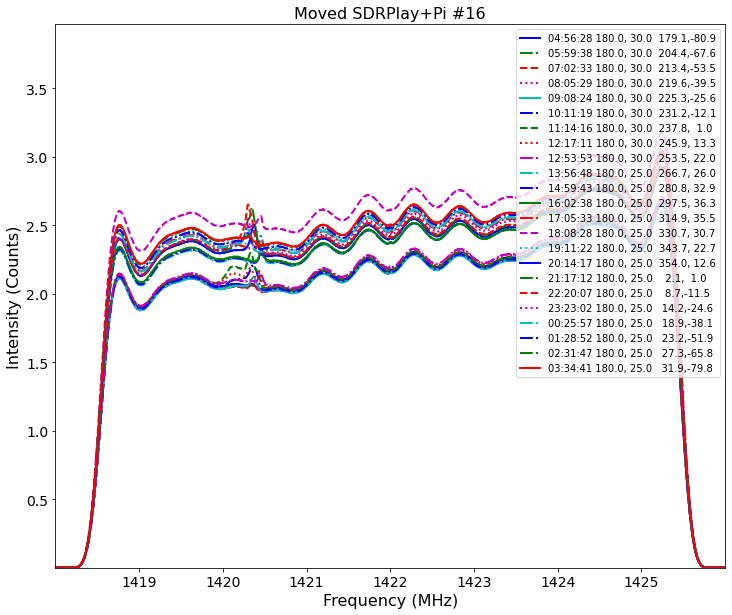

In [5]:
p.raw(files)

In [6]:
# start a new plot with different parameters
names = p.help("-V -BASE -C -R -I 3600 " + datadir)

Fitting and subtracking a baseline
Flagging RFI
Spectral integration time for averaging: 3600.000000


Found 1 Cold Sky Obs.; Min El =    80.0, Low Gal Lat:    40.0
Median Receiver Temp:  172.79 +/-  0.15 ( 0.16  0.13) (K)
Ploting Intensity versus Velocity
Date: 2021-10-26
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median   X (km/s)  Count 
04:56:28 180.0, 30.0  179.1,-80.9     5.25     0.31     0.592   540000
05:59:38 180.0, 30.0  204.4,-67.6     5.80     0.41     8.572   540000
07:02:33 180.0, 30.0  213.4,-53.5     7.76     0.29    14.877   540000
08:05:29 180.0, 30.0  219.6,-39.5     9.47     0.16    22.259   540000
09:08:24 180.0, 30.0  225.3,-25.6    14.88     0.30    23.645   540000
10:11:19 180.0, 30.0  231.2,-12.1    23.87     0.02    29.337   540000
11:14:16 180.0, 30.0  237.8,  1.0    32.67     0.26    37.387   540000
12:17:11 180.0, 30.0  245.9, 13.3    17.89     0.44    39.377   540000
12:53:53 180.0, 30.0  253.5, 22.0    15.36     0.44    13.563   292500
13:56:48 180.0, 25.0  266.7, 26.0    11.41     0.42     8.732   562500
14:59:43 180.0, 25.0  280.8, 32.9    10.85     0

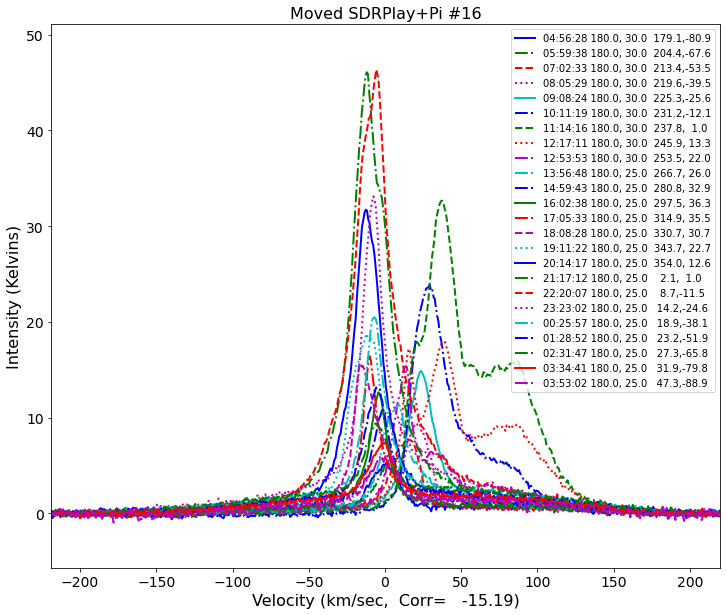

In [7]:
# now plot the average calibrated spectra for a few minutes of observations
p.tsys(names, doDebug=False)

In [8]:
keepdir = "./keep/"
!mkdir {keepdir}

mkdir: ./keep/: File exists


## Find and keep the average spectra

In [9]:
# create a new plot structure
# Select only the low galactic latitude data
names = p.help("-V -G 5 -BASE -C -R -I 3600 -O " + keepdir + " " + datadir)

Fitting and subtracking a baseline
Flagging RFI
Spectral integration time for averaging: 3600.000000
Writing average spectra to directory: ./keep/
Averaging obs. for Galactic Latitude range +/-      5.0


Found 1 Cold Sky Obs.; Min El =    80.0, Low Gal Lat:    40.0
Median Receiver Temp:  172.79 +/-  0.15 ( 0.16  0.13) (K)
Ploting Intensity versus Velocity
Date: 2021-10-26
  Time   AZ,EL (deg)  Lon,Lat (deg)  Max-(K)-Median   X (km/s)  Count 
11:06:22 180.0, 30.0  237.4,  0.2    33.24     0.27    36.475   427500
Average: 533: 1.32    33.24  36.48 T0-21-10-26T104009.kel
21:19:49 180.0, 25.0    2.9,  0.3    47.38     1.10   -11.604   450000
Average: 532: 5.11    47.38  -11.60 T0-21-10-26T205337.kel
Date: 2021-10-27


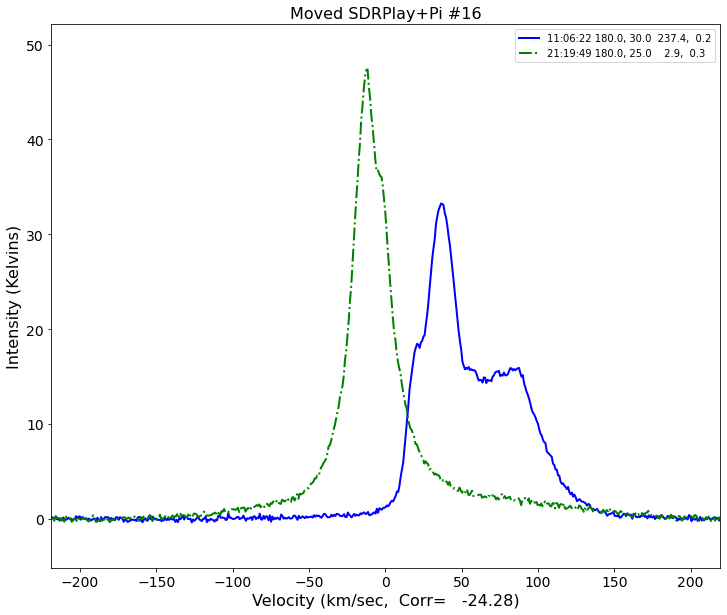

In [10]:
p.tsys(names, doDebug= False)

# Congratulations!
## You've searched an entier days observations for measurements at low galactic Latitude.
### You've used a previous day's calibration observations and found very strong hydrogen emission from two directions in the Galactic Plane